# U.S. Medical Insurance Costs

The goal of this project is to analyze various attributes within **insurance.csv**, provided by Codecademy.com, using python, to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

The analysis consists of the following objectives:

1. Analyze age groups and specify gender balance in them.  
    - Determine the gender proportion in general and by age groups.
    - Find out the age of the youngest representatives and the oldest.
    - Find out the average age of the patients in the dataset.
    - Figure out what the average age is for someone who has at least one child in this dataset.
2. Find correlations between different parameters like Age and BMI, Smoking and Insurance Cost.
3. Find out whether  the numerical values of the parameters equally distributed across the regions. 
    - Analyze where a majority of the individuals are from.
    - Find out if there are regions where there are statistically more people who smoke and have 1 or more children.
        - Find those who smoke and compare with the number of non smokers.
        - Find those who have 1 or more children;
        - Find people with bmi above (24.9) and below (18.5) normal.
4. Compare insurance costs.
    - Find out average, minimum, and maximum insurance costs through the whole country.
    - Find out avarage costs:
        - in the country;
        - for smokers;
        - for people with children.


To implement these objectives one should import and read the insurance.csv, and put it in a list for further usage.

In [708]:
import csv

users_list = []
with open('insurance.csv', newline = '') as users_csv:
    user_reader = csv.DictReader(users_csv)
    for user in user_reader:
        user['age'] = int(user['age']) 
        user['bmi'] = float(user['bmi'])
        user['children'] = int(user['children'])
        user['charges'] = float(user['charges'])
        user['smoker'] = user['smoker'] == 'yes'
        users_list.append(user)


### 1. Analyze age groups and specify gender balance in them

##### 1.1. Create generalized age groups:
* 18 - 25;
* 26 - 30;
* 31 - 45;
* 46 - 60;
* 61 - 75;
* 76 and older.


In [709]:
age_groups = {
    '18-25': {
        'male': 0,
        'female': 0,
        'total': 0
    },
    '26-30': {
        'male': 0,
        'female': 0,
        'total': 0
    },    
    '31-45': {
        'male': 0,
        'female': 0,
        'total': 0
    }, 
    '46-60': {
        'male': 0,
        'female': 0,
        'total': 0
    }, 
    '61-75': {
        'male': 0,
        'female': 0,
        'total': 0
    }, 
    '76 +': {
        'male': 0,
        'female': 0,
        'total': 0
    } 
}

##### 1.2. Put representatives' data points in corresponding age groups and determine gender proportion in each of the age groups

In [710]:

for user in users_list:
    age = user['age']
    sex = user['sex']
    if age >= 18 and age <= 25:
        age_groups['18-25']['total'] += 1
        age_groups['18-25'][sex] += 1
    elif age >= 26 and age <= 30:
        age_groups['26-30']['total'] += 1
        age_groups['26-30'][sex] += 1
    elif age >= 31 and age <= 45:
        age_groups['31-45']['total'] += 1
        age_groups['31-45'][sex] += 1
    elif age >= 46 and age <= 60:
        age_groups['46-60']['total'] += 1
        age_groups['46-60'][sex] += 1
    elif age >= 61 and age <= 75:
        age_groups['61-75']['total'] += 1
        age_groups['61-75'][sex] += 1
    elif age >= 76:
        age_groups['76 +']['total'] += 1
        age_groups['76 +'][sex] += 1
age_groups

{'18-25': {'male': 159, 'female': 147, 'total': 306},
 '26-30': {'male': 71, 'female': 67, 'total': 138},
 '31-45': {'male': 199, 'female': 195, 'total': 394},
 '46-60': {'male': 203, 'female': 206, 'total': 409},
 '61-75': {'male': 44, 'female': 47, 'total': 91},
 '76 +': {'male': 0, 'female': 0, 'total': 0}}

##### 1.3. Сonvert gender distribution to percentages

In [711]:
def percentage_calc(part, whole):
    if whole == 0:
        return 0
    percentage = round(100 * part/whole, 2)
    return percentage

def age_groups_in_percentages(list):
    age_groups_in_perc = {
        '18-25': {
            'male': 0,
            'female': 0,
            'diff': 0
        },
        '26-30': {
            'male': 0,
            'female': 0,
            'diff': 0
        },    
        '31-45': {
            'male': 0,
            'female': 0,
            'diff': 0
        }, 
        '46-60': {
            'male': 0,
            'female': 0,
            'diff': 0    
        }, 
        '61-75': {
            'male': 0,
            'female': 0,
            'diff': 0
        }, 
        '76 +': {
            'male': 0,
            'female': 0,
            'diff': 0
        } 
    }
    for key, value in age_groups.items():
        age_groups_in_perc[key]['male'] = percentage_calc(value['male'], value['total'])
        age_groups_in_perc[key]['female'] = percentage_calc(value['female'], value['total'])
        age_groups_in_perc[key]['diff'] = round(abs(age_groups_in_perc[key]['male'] - age_groups_in_perc[key]['female']), 2)
    return age_groups_in_perc




age_groups_in_percentages(age_groups)

{'18-25': {'male': 51.96, 'female': 48.04, 'diff': 3.92},
 '26-30': {'male': 51.45, 'female': 48.55, 'diff': 2.9},
 '31-45': {'male': 50.51, 'female': 49.49, 'diff': 1.02},
 '46-60': {'male': 49.63, 'female': 50.37, 'diff': 0.74},
 '61-75': {'male': 48.35, 'female': 51.65, 'diff': 3.3},
 '76 +': {'male': 0, 'female': 0, 'diff': 0}}

##### 1.4. Determine general gender proportion in numbers and percentages

In [712]:
total_n_males = 0
total_n_females = 0
for value in age_groups.values():
    total_n_males += value['male']
for value in age_groups.values():
    total_n_females += value['female']

total_n_users = total_n_females + total_n_males

print(percentage_calc(total_n_males, total_n_users))
print(percentage_calc(total_n_females, total_n_users))

50.52
49.48



##### 1.5. Show gender and age distribution on a graph


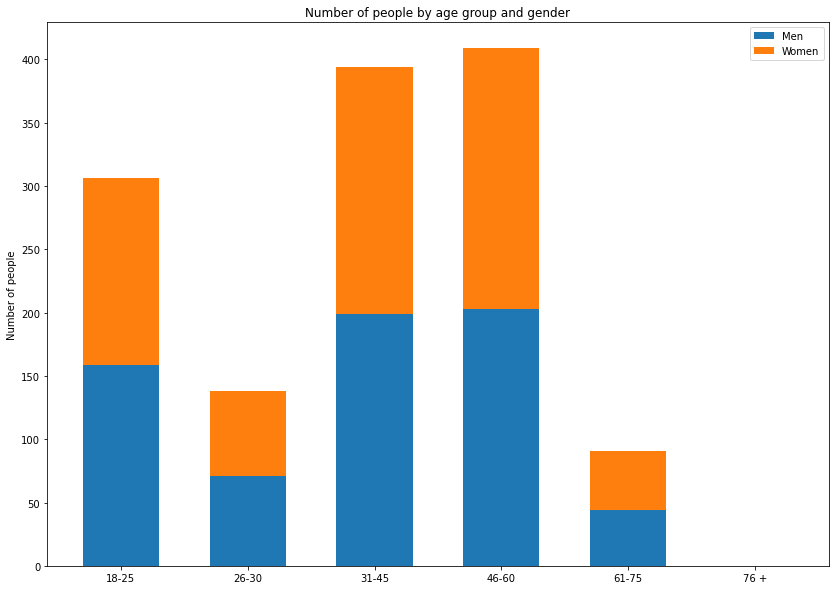

In [713]:
import matplotlib.pyplot as plt

labels = age_groups.keys()
men_ages = [value['male'] for value in age_groups.values()]
women_ages = [value['female'] for value in age_groups.values()]
width = 0.60       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(14, 10))

ax.bar(labels, men_ages, width, label='Men')
ax.bar(labels, women_ages, width, bottom=men_ages,
       label='Women')

ax.set_ylabel('Number of people')
ax.set_title('Number of people by age group and gender')
ax.legend()

plt.show()


##### 1.6. Find out the age of the youngest representatives and the oldest

In [714]:
ages_list = [user['age'] for user in users_list]
youngest = min(ages_list)
oldest = max(ages_list)
youngest, oldest


(18, 64)

##### 1.7. Find out the average age of the patients in the dataset

In [715]:
def average(lst):
  if len(lst) == 0:
    return 0
  return sum(lst) / len(lst)
  
round(average([user['age'] for user in users_list]))

39

##### 1.8. Figure out what the average age is for someone who has at least one child in this dataset

In [716]:
round(average([user['age'] for user in users_list if user['children'] > 0]))

40

#### Conclusion: 
2 age groups from `31 to 45` and from `46 to 60` are the most represented, they contain `394` and `409` people, respectively. Among the group aged `31 to 45` — `2%` more men, in the second group genders are represented `equally`.

Next is the youth from `18 to 25` with the number of people `306` and with `4%` more men among them.

The fewest amount of all presented in the age groups from `61 to 75` and from `26 to 31` — `91` and `138` respectively. Among the age group from `61 to 75` — `4%` more women, among age from `26 to 31` — `2%` more men.

There are no people over `75` years. 

The youngest representatives are `18` years old.

The oldest are `64`.

The average age of the patients in the dataset is `39`.

The average age for someone who has at least one child is `40`.


### 2. Find correlations between different parameters like Age and BMI, Smoking and Insurance Cost




##### 2.1. Import `NumPy` library and calculate _Pearson product-moment correlation coefficients_ using the data from **insurance.csv** file to discover a possible correlation between parameters: age, having children, BMI, smoking, and insurance costs. 

**Note:** Correlation measures the **strength of association** between two variables as well as the **direction** and is represented by a number — _correlation coefficient_, which numerical value lies between `-1.0` and `+1.0`. One significant type of correlation is _Pearson's correlation coefficient_. This type of correlation is used to measure the relationship between two continuous variables. 

In [717]:
import numpy

numpy.corrcoef([
    [user['age'] for user in users_list],
    [user['children'] for user in users_list],
    [user['bmi'] for user in users_list],
    [1 if user['smoker'] else 0 for user in users_list],
    [user['charges'] for user in users_list],
])

array([[ 1.        ,  0.042469  ,  0.10927188, -0.02501875,  0.29900819],
       [ 0.042469  ,  1.        ,  0.0127589 ,  0.00767312,  0.06799823],
       [ 0.10927188,  0.0127589 ,  1.        ,  0.00375043,  0.19834097],
       [-0.02501875,  0.00767312,  0.00375043,  1.        ,  0.78725143],
       [ 0.29900819,  0.06799823,  0.19834097,  0.78725143,  1.        ]])

##### 2.2. Create a correlation matrix

Parameters for correlation|Age|Children|BMI|Smoking|Insurance Cost
-|-|-|-|-|-
**Age**| 1. |  | |  | 
**Children**| 0.042469 | 1. | |  | 
**BMI**| **`0.10927188`** |0.0127589|1.|  | 
**Smoking**| -0.02501875 | 0.00767312 | 0.00375043 | 1. | 
**Insurance Cost**|**`0.29900819`**| 0.06799823  | **`0.19834097`** | **`0.78725143`**|1.



##### Guidelines to interpret the Pearson coefficient correlation:

A **negative** value of the correlation coefficient means that when there is a change in one variable, the other changes in a proportion but in the **opposite direction**, and if the value of the correlation coefficient is **positive**, both the variables change in a proportion and the **same direction**. 

When the value of the correlation coefficient is **exactly 1.0**, it is said to be a **perfect positive correlation**. This situation means that when there is a change in one variable, either negative or positive, the second variable changes in lockstep, in the same direction. **In this case, it happens when the same parameters are being correlated e.g. age and age**

A **perfect negative correlation (-1)** means that two assets move in **opposite directions**, while a **zero** correlation implies **no linear relationship** at all. 


Strength of association|Positive|Negative
-|-|-
Small|.1 to .3|-0.1 to -0.3
Medium|.3 to .5|-0.3 to -0.5
Large|.5 to 1.0|-0.5 to -1.0




#### Conclusion: 

The strongest positive correlation is traced between **Smoking** and **Insurance cost**: it's equal to almost `0.8`. Meaning if a person smokes they pay significantly more for a health insurance. 

There is also a small positive correlation  —  equal to almost `0.3`,  between **Age** and **Insurance cost**.

**BMI** and **Insurance cost**  —  almost `0.2`.

As well as **BMI** and **Age**  —  `0.1`.

All other correlations, according to guidelines, may be considered insignificant. 

### 3. Find out whether  the numerical values of the parameters equally distributed across the regions


##### 3.1. Create separate datasets (dictionaries)  contain users' info from each region in them


In [718]:
def separate_regions(list_of_users):
    southwest = [user for user in list_of_users if user['region'] == 'southwest']
    southeast = [user for user in list_of_users if user['region'] == 'southeast']
    northwest = [user for user in list_of_users if user['region'] == 'northwest']
    northeast = [user for user in list_of_users if user['region'] == 'northeast']
    return {
        'southwest': southwest, 
        'southeast': southeast, 
        'northwest': northwest, 
        'northeast': northeast,
    }

regions = separate_regions(users_list)

##### 3.2. Count the number of people in each of the regions

In [719]:
region_counts = [(region[0], len(region[1])) for region in regions.items()]
region_counts

[('southwest', 325),
 ('southeast', 364),
 ('northwest', 325),
 ('northeast', 324)]

##### 3.3. Analyze where a majority of the individuals are from

In [720]:
max(region_counts, key=lambda r: r[1])

('southeast', 364)

##### 3.4. Find out if there are regions where there are statistically more people who smoke and have 1 or more children
3.4.1. Find those who smokes and compare with the number of non smokers



In [721]:
smokers_counts = [(region[0], len([user for user in region[1] if user['smoker']])) for region in regions.items()]
non_smokers_counts = [(region[0], len([user for user in region[1] if not user['smoker']])) for region in regions.items()]

print(smokers_counts)
print(non_smokers_counts)

[('southwest', 58), ('southeast', 91), ('northwest', 58), ('northeast', 67)]
[('southwest', 267), ('southeast', 273), ('northwest', 267), ('northeast', 257)]


3.4.2. Output result on a graph

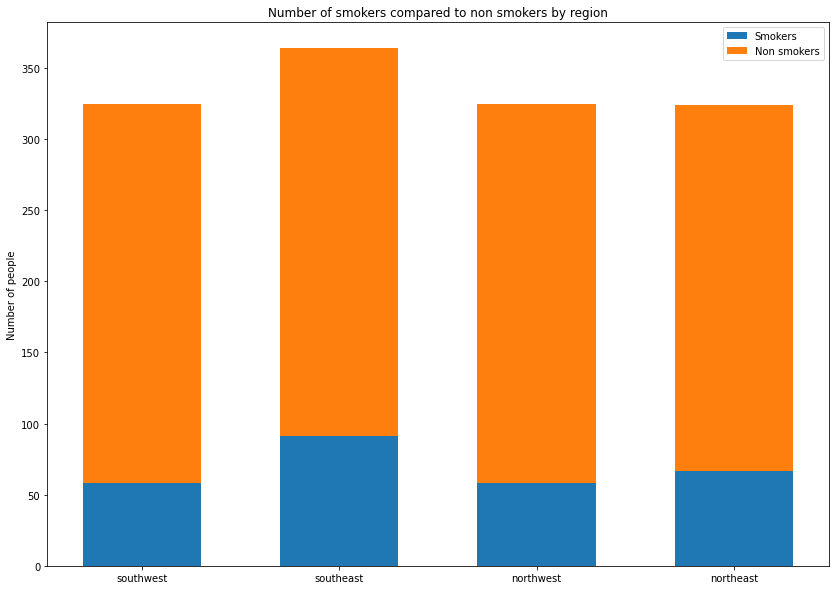

In [722]:
import matplotlib.pyplot as plt

labels = regions.keys()
smokers = [value[1] for value in smokers_counts]
non_smokers = [value[1] for value in non_smokers_counts]
width = 0.60       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(14, 10))

ax.bar(labels, smokers, width, label='Smokers')
ax.bar(labels, non_smokers, width, bottom=smokers, label='Non smokers')

ax.set_ylabel('Number of people')
ax.set_title('Number of smokers compared to non smokers by region')
ax.legend()

plt.show()


In [723]:
print(region_counts)
print(smokers_counts)
smokers_counts = [(region[0], len([user for user in region[1] if user['smoker']])) for region in regions.items()]

[('southwest', 325), ('southeast', 364), ('northwest', 325), ('northeast', 324)]
[('southwest', 58), ('southeast', 91), ('northwest', 58), ('northeast', 67)]


3.4.2. Find smokers in percentages

In [724]:
smokers_in_pers = [(smokers_counts[value][0], percentage_calc(smokers_counts[value][1], region_counts[value][1])) for value in range(4)]
smokers_in_pers


[('southwest', 17.85),
 ('southeast', 25.0),
 ('northwest', 17.85),
 ('northeast', 20.68)]

3.4.3. Find those who have 1 or more children

In [733]:
def children_counter():
    children_n_by_region = {}
    for value in range(1,7):
        children_n_by_region[value] = [(region[0], len([user for user in region[1] if user['children'] == value])) for region in regions.items()]
    return children_n_by_region

children_counter()

{1: [('southwest', 78),
  ('southeast', 95),
  ('northwest', 74),
  ('northeast', 77)],
 2: [('southwest', 57),
  ('southeast', 66),
  ('northwest', 66),
  ('northeast', 51)],
 3: [('southwest', 37),
  ('southeast', 35),
  ('northwest', 46),
  ('northeast', 39)],
 4: [('southwest', 7), ('southeast', 5), ('northwest', 6), ('northeast', 7)],
 5: [('southwest', 8), ('southeast', 6), ('northwest', 1), ('northeast', 3)],
 6: [('southwest', 0), ('southeast', 0), ('northwest', 0), ('northeast', 0)]}

3.4.4. Find the average number of children by region

In [726]:
[(region[0], round(average([user['children'] for user in region[1] if user['children'] > 0]))) for region in regions.items()]

[('southwest', 2), ('southeast', 2), ('northwest', 2), ('northeast', 2)]

3.4.5. Find people with bmi above (24.9) and below (18.5) normal

In [727]:
def deviations_in_bmi(list_of_regions, people_n_by_region):
    bmi_deviations = {
            'southwest': {
                'above_norm': 0,
                'in_percentages_above': 0,
                'below_norm': 0,
                'in_percentages_below': 0
            }, 
            'southeast': {
                'above_norm': 0,
                'in_percentages_above': 0,
                'below_norm': 0,
                'in_percentages_below': 0
            }, 
            'northwest': {
                'above_norm': 0,
                'in_percentages_above': 0,
                'below_norm': 0,
                'in_percentages_below': 0
            }, 
            'northeast': {
                'above_norm': 0,
                'in_percentages_above': 0,
                'below_norm': 0,
                'in_percentages_below': 0
            }
        }

    for region in regions.items():
        for user in region[1]:
            if user['bmi'] > 24.9:
                bmi_deviations[region[0]]['above_norm'] += 1
            elif user['bmi'] < 18.5:
                bmi_deviations[region[0]]['below_norm'] += 1
        bmi_deviations[region[0]]['in_percentages_above'] = percentage_calc(bmi_deviations[region[0]]['above_norm'], len(region[1]))
        bmi_deviations[region[0]]['in_percentages_below'] = percentage_calc(bmi_deviations[region[0]]['below_norm'], len(region[1]))    
        
    return bmi_deviations
    

deviations_in_bmi(regions, region_counts)


{'southwest': {'above_norm': 274,
  'in_percentages_above': 84.31,
  'below_norm': 3,
  'in_percentages_below': 0.92},
 'southeast': {'above_norm': 324,
  'in_percentages_above': 89.01,
  'below_norm': 0,
  'in_percentages_below': 0.0},
 'northwest': {'above_norm': 256,
  'in_percentages_above': 78.77,
  'below_norm': 7,
  'in_percentages_below': 2.15},
 'northeast': {'above_norm': 242,
  'in_percentages_above': 74.69,
  'below_norm': 10,
  'in_percentages_below': 3.09}}

#### Conclusion:
Most users are from the southeast region, there are `364` of them, which is `~40` more than in others.
There are also significantly more smokers in this region — `91 or 25%` of all people in the dataset, whereas in other regions only `17-20%`. 

The average number of children by region is `~2`, with a difference in thousandths of a percent, even for a region where there are more people. 

The BMI is above normal in all regions. Most people over the age of 18 are affected by this factor:  
  - `84.31%` in the southwest;
  - `89.01%` in the southeast;
  - `78.77%` in the northwest:
  - `74.69%` in the northeast.

The southeast is an absolute leader among regions, although one can notice that despite the issue being extremely serious through all parts of America, in the south it's even more imperative than in the north. On the contrary, a number of cases with the BMI less than normal are absent in the southeast, only `3%` in the southwest, but goes up to `7%`, and `10%` in the northwest and northeast respectively. 

### 4. Compare insurance costs

4.1. Find out average cost through the whole country


In [728]:
round(average([user['charges'] for user in users_list]))


13270

4.2. Compare average costs through regions

In [729]:
cost_by_regions = {region: round(average([user['charges'] for user in users])) for region, users in regions.items()}
cost_by_regions

{'southwest': 12347,
 'southeast': 14735,
 'northwest': 12418,
 'northeast': 13406}

4.3. Find out the minimum and maximum insurance costs

In [730]:
print(('min', round(min([user['charges'] for user in users_list]))))
print(('max', round(max([user['charges'] for user in users_list]))))

('min', 1122)
('max', 63770)


4.4. Find out avarage cost for smokers

In [731]:
cost_for_smokers = round(average([user['charges'] for user in users_list if user['smoker']]))
cost_for_smokers

32050

4.5. Find out average insurance costs for people with children

In [732]:
{
    children: round(average([user['charges'] for user in users_list if user['children'] == children])) for children in range(6)
}

{0: 12366, 1: 12731, 2: 15074, 3: 15355, 4: 13851, 5: 8786}

#### Conclusion:
The average insurance cost in America is `13 270`.

The minimum cost is `1121`.
The maximum — `63 770`.

Average costs though regions differ, but not significantly. The southeast has the most costly average health insurance of `14 735`. Others have `~12-13K`.

The avarage cost for smokers is `32 050`

The average cost for people with children are differ, but judging by results from item 2, there is no correlation between number of children and cost of insurance, so there should be some other factors at play, like age or bmi on a lesser amount of users. The depending on the number of children are the following: 
- `12 366` if no children;
- `12 731` if only 1 child;
- `15 074` if 2 children;
- `15 355` if 3 children;
- `13 851` if 4 children;
- `8 786` if 5 children.

